In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
#import pymaster as nmt
import scipy.sparse as sparse
import pickle

In [3]:
with open(f'B_eigs_2000.pkl', 'rb') as f:
    B_eigs = pickle.load(f)
eigs, v = B_eigs

In [20]:
nside = 64
npix = hp.nside2npix(nside)
npix

49152

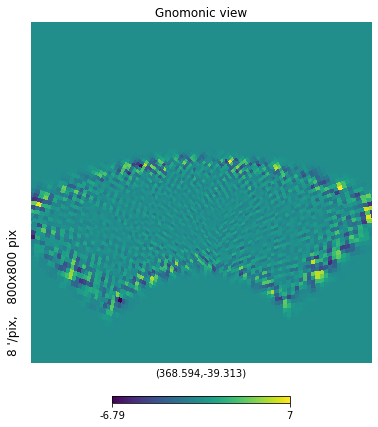

In [52]:
m = v[:,0][:npix]
lon,lat = hp.pix2ang(nside, np.argmax(m), lonlat=True)
lon+=10
lat+= -10
hp.gnomview(m, rot=(lon, lat), xsize=800, reso=8)
#hp.gnomview(m_vector[npix:], rot=(lon, lat), xsize=800, reso=5)

In [53]:
def get_mask_analytic(ns, aps, fsk=0.0945, dec0=0., ra0=0.) :
    #This generates a correctly-apodized mask
    DTOR = np.pi/180
    v0=np.array([np.sin(DTOR*(90-dec0))*np.cos(DTOR*ra0),
                 np.sin(DTOR*(90-dec0))*np.sin(DTOR*ra0),
                 np.cos(DTOR*(90-dec0))])
    vv=np.array(hp.pix2vec(ns,np.arange(hp.nside2npix(ns))))
    cth=np.sum(v0[:,None]*vv,axis=0); th=np.arccos(cth); th0=np.arccos(1-2*fsk); th_apo=aps*DTOR
    id0=np.where(th>=th0)[0]
    id1=np.where(th<=th0-th_apo)[0]
    idb=np.where((th>th0-th_apo) & (th<th0))[0]
    x=np.sqrt((1-np.cos(th[idb]-th0))/(1-np.cos(th_apo)))
    mask_apo=np.zeros(hp.nside2npix(ns))
    mask_apo[id0]=0.
    mask_apo[id1]=1.
    mask_apo[idb]=x-np.sin(2*np.pi*x)/(2*np.pi)
    return mask_apo

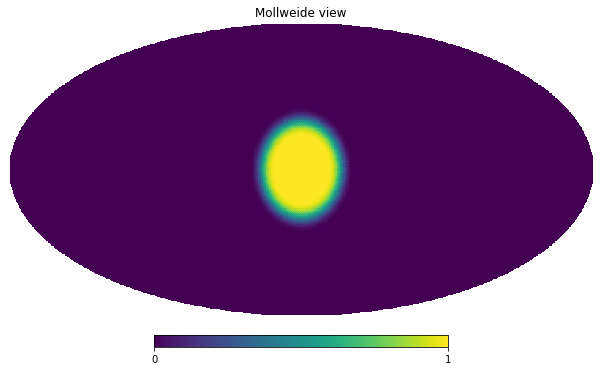

In [62]:
msk_apo = get_mask_analytic(nside, 17., fsk=0.08)
# Binary mask
msk_bin = np.ones_like(msk_apo)
msk_bin[msk_apo <= 0] = 0
hp.mollview(msk_apo)

In [63]:
hp.write_map('analytic_mask_apo.fits', msk_apo)

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_aux/lib/python3.7/site-packages/healpy-1.13.0-py3.7-linux-x86_64.egg/healpy/fitsfunc.py:187: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning)
